===== 1. CARGANDO ARCHIVOS =====
Cargando: C:/Users/felip/Documents/Portafolio_Jupyter\Top-Películas.csv
Cargando: C:/Users/felip/Documents/Portafolio_Jupyter\Ventas.csv
Cargando: C:/Users/felip/Documents/Portafolio_Jupyter\peliculas_100_2005_2024.xlsx
Archivos cargados correctamente.
===== 2. LIMPIANDO DATOS =====
Limpieza completada.
===== 3. TRANSFORMANDO DATOS =====
Transformación completada.
===== 4. GUARDANDO DATOS =====
Archivos guardados en:
 - peliculas: C:\Users\felip\Documents\Portafolio_Jupyter\data\processed\peliculas_clean.csv
 - ventas: C:\Users\felip\Documents\Portafolio_Jupyter\data\processed\ventas_clean.csv
 - peliculas_200: C:\Users\felip\Documents\Portafolio_Jupyter\data\processed\peliculas_200_clean.csv
===== 5. GENERANDO GRÁFICOS =====
Mostrando gráfico de recaudación de películas...
['Titulo', 'Genero', 'Año', 'Duracion_min', 'Rating_IMDB', 'Recaudacion_USD', 'Costos_USD', 'Studio']


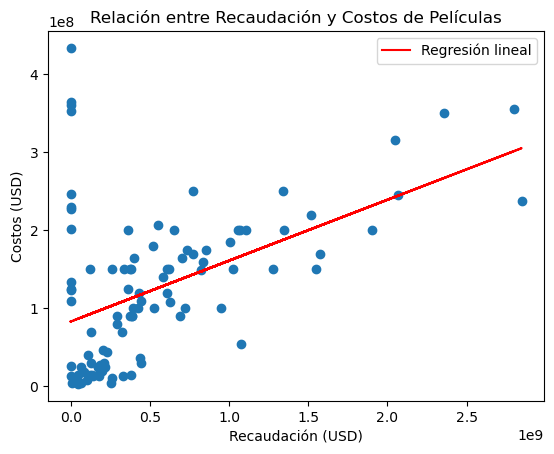

Rentable
1    85
0    15
Name: count, dtype: int64
Precisión del modelo: 0.9


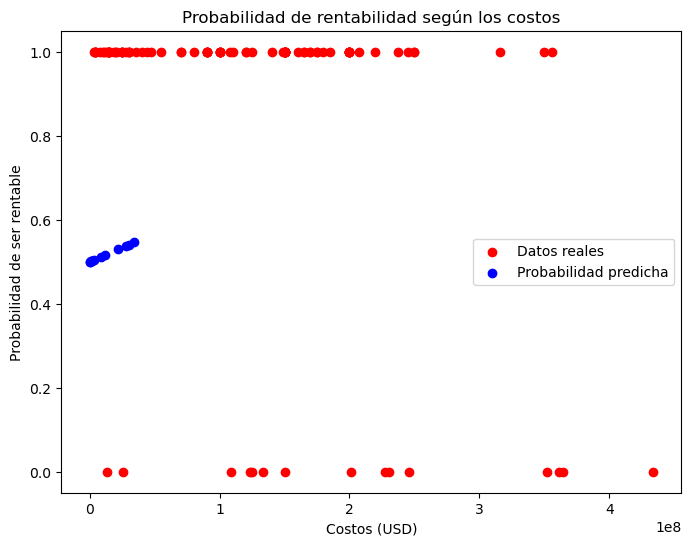

===== PIPELINE COMPLETADO =====


In [1]:
# ===========================
# MAIN PIPELINE - EJECUTA TODO
# ===========================

import pandas as pd

# ---- 1. CARGA ----
from Carga_datos import (
    load_raw_peliculas,
    load_raw_ventas,
    load_raw_peliculas_200
)

# ---- 2. LIMPIEZA ----
from Limpieza_datos import (
    clean_peliculas,
    clean_ventas, 
    clean_peliculas_200
)

# ---- 3. TRANSFORMACIÓN ----
from transformar_datos import transformar_datos

# ---- 4. GUARDADO ----
from Guardar_datos import guardar_datos

# ---- 5. GRÁFICOS ----

from Graficos_carga import distribucion_categoria_productos

def main():
    print("===== 1. CARGANDO ARCHIVOS =====")
    df_peliculas_raw = load_raw_peliculas()
    df_ventas_raw = load_raw_ventas()
    df_peliculas200 = load_raw_peliculas_200()

    print("Archivos cargados correctamente.")

    print("===== 2. LIMPIANDO DATOS =====")
    df_peliculas_clean = clean_peliculas(df_peliculas_raw)
    df_ventas_clean = clean_ventas(df_ventas_raw)
    df_peliculas_clean_200 = clean_peliculas_200(df_peliculas200)
    print("Limpieza completada.")

    print("===== 3. TRANSFORMANDO DATOS =====")
    df_peliculas_trans = transformar_datos(df_peliculas_clean)
    df_ventas_trans = transformar_datos(df_ventas_clean)
    df_peliculas_200_trans = transformar_datos(df_peliculas_clean_200)
    print("Transformación completada.")

    print("===== 4. GUARDANDO DATOS =====")
    rutas = guardar_datos({
        "peliculas": df_peliculas_trans,
        "ventas": df_ventas_trans,
        "peliculas_200": df_peliculas_200_trans
    })
    print("Archivos guardados en:")
    for k, v in rutas.items():
        print(f" - {k}: {v}")

    print("===== 5. GENERANDO GRÁFICOS =====")

    # Gráficos de películas
    print("Mostrando gráfico de recaudación de películas...")
    distribucion_categoria_productos(df_peliculas_trans, df_ventas_trans, df_peliculas200)


    print("===== PIPELINE COMPLETADO =====")


if __name__ == "__main__":
    main()
